In this notebook, we use our knowledge of artists to build an animation. 

We reuse the charts from the [static](N1_static_solution.ipynb) notebook for the sake of time. 

see also:
- https://matplotlib.org/devdocs/users/explain/animations/index.html

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#load the palmer's dataset, drop missing values, and check which of our variables are numbers
df = pd.read_csv("data/penguins.csv").dropna()

Text(0, 0.5, 'mm')

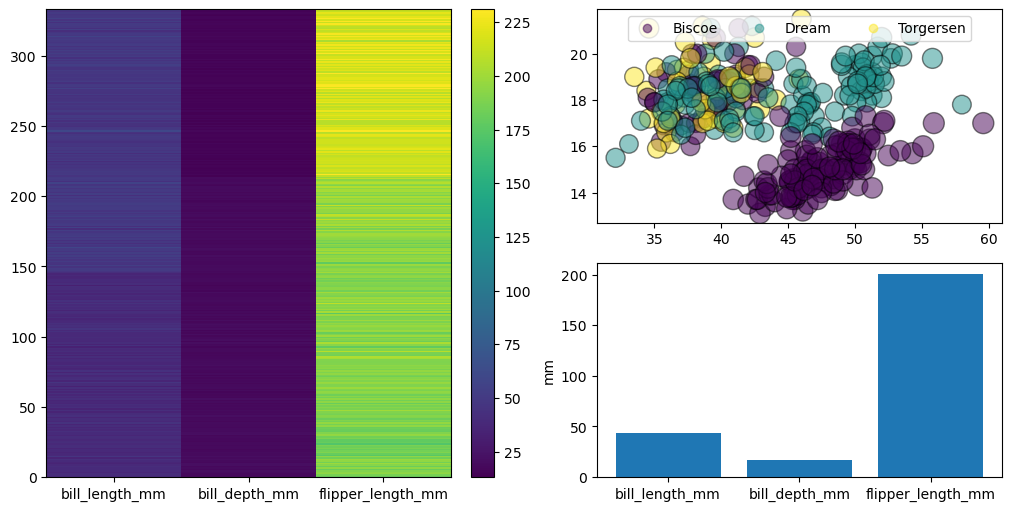

In [4]:
#we're gonna rearrange the figure to see it nicer 
fig, axd = plt.subplot_mosaic([['heatmap', 'scatter'],['heatmap', 'bar']], layout='constrained', figsize=(10,5))

### all code from above
im = axd['heatmap'].pcolormesh(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']])
cax = fig.colorbar(im)
axd['heatmap'].set_xticks([.5, 1.5, 2.5])
axd['heatmap'].set_xticklabels(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'])

# lets encode all the things! let's also play w/ this

cat_for_color = df['island'].astype('category')
sc = axd['scatter'].scatter('bill_length_mm', 'bill_depth_mm', s='flipper_length_mm', c=cat_for_color.cat.codes, alpha=.5, ec='k', data =df)
handles, labels = sc.legend_elements()
# https://matplotlib.org/stable/users/explain/axes/legend_guide.html
axd['scatter'].legend(handles, cat_for_color.cat.categories, ncol=3, loc='upper center')

# lets add a bar chart
dfquant = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
axd['bar'].bar(dfquant, df[dfquant].mean())
axd['bar'].set_ylabel("mm")

<BarContainer object of 3 artists>

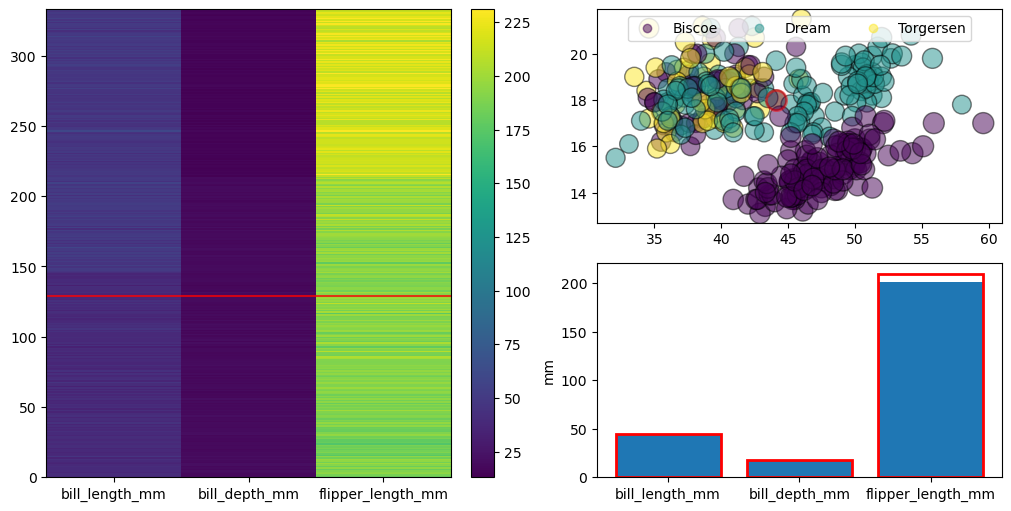

In [40]:
#we're gonna rearrange the figure to see it nicer 
fig, axd = plt.subplot_mosaic([['heatmap', 'scatter'],['heatmap', 'bar']], layout='constrained', figsize=(10,5))

dfquant = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

### all code from above
im = axd['heatmap'].pcolormesh(df[dfquant])
cax = fig.colorbar(im)
axd['heatmap'].set_xticks([.5, 1.5, 2.5])
axd['heatmap'].set_xticklabels(dfquant)

# lets encode all the things! let's also play w/ this

cat_for_color = df['island'].astype('category')
sc = axd['scatter'].scatter('bill_length_mm', 'bill_depth_mm', s='flipper_length_mm', c=cat_for_color.cat.codes, alpha=.5, ec='k', data =df)
handles, labels = sc.legend_elements()
# https://matplotlib.org/stable/users/explain/axes/legend_guide.html
axd['scatter'].legend(handles, cat_for_color.cat.categories, ncol=3, loc='upper center')

# lets add a bar chart

axd['bar'].bar(dfquant, df[dfquant].mean())
axd['bar'].set_ylabel("mm")

### lets highlight one penguin!
cats = {c:i for i, c in enumerate(cat_for_color.cat.categories)}
penguin = df.sample(1, random_state=19680801)
axd['heatmap'].axhline(penguin.index[0], color='red', alpha=.75)
axd['scatter'].scatter('bill_length_mm', 'bill_depth_mm', s='flipper_length_mm', c=cats[penguin['island'].values[0]], alpha=.5, ec='r', linewidth=2, data=penguin)
axd['bar'].bar(dfquant,  penguin[dfquant].values.squeeze(), facecolor='none', edgecolor='r', lw=2)

In [43]:
import matplotlib.animation as animation
from IPython.display import HTML

Animation size has reached 21034785 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


IndexError: single positional indexer is out-of-bounds

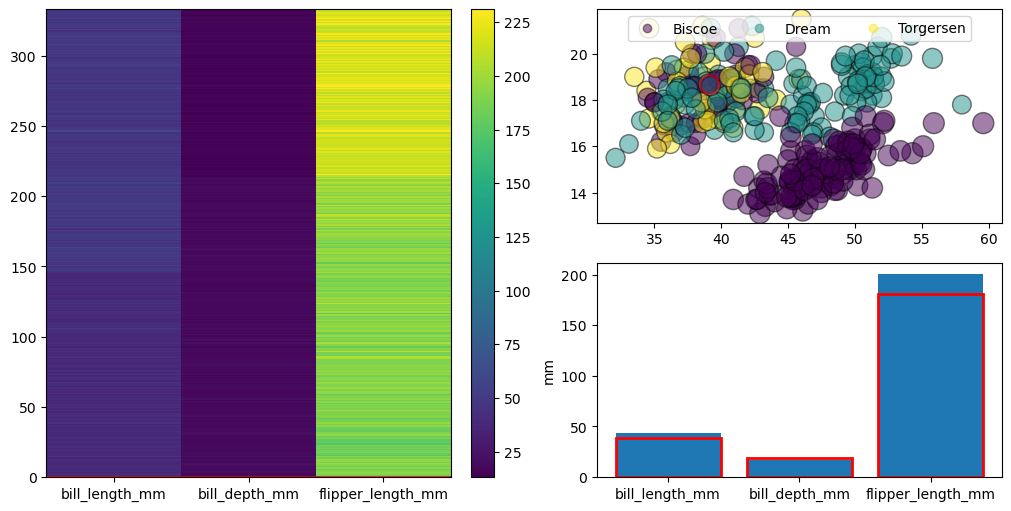

In [46]:
# we use a subset here to speed up rendering
fig, axd = plt.subplot_mosaic([['heatmap', 'scatter'],['heatmap', 'bar']], layout='constrained', figsize=(10,5))

dfquant = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

### all code from above
im = axd['heatmap'].pcolormesh(df[dfquant])
cax = fig.colorbar(im)
axd['heatmap'].set_xticks([.5, 1.5, 2.5])
axd['heatmap'].set_xticklabels(dfquant)

# lets encode all the things! let's also play w/ this

cat_for_color = df['island'].astype('category')
sc = axd['scatter'].scatter('bill_length_mm', 'bill_depth_mm', s='flipper_length_mm', c=cat_for_color.cat.codes, alpha=.5, ec='k', data =df)
handles, labels = sc.legend_elements()
# https://matplotlib.org/stable/users/explain/axes/legend_guide.html
axd['scatter'].legend(handles, cat_for_color.cat.categories, ncol=3, loc='upper center')

# lets add a bar chart

axd['bar'].bar(dfquant, df[dfquant].mean())
axd['bar'].set_ylabel("mm")


#lets make the first objects that we'll update
h = axd['heatmap'].axhline(0, color='red', alpha=.75)
s = axd['scatter'].scatter('bill_length_mm', 'bill_depth_mm', s='flipper_length_mm', c=cats[df['island'][0]], alpha=.5, ec='r', linewidth=2, data=df.iloc[0])
b = axd['bar'].bar(dfquant, df[dfquant].iloc[0], color='none', ec='r', lw=2)

def update(frame):
    if frame not in df.index:
        return
    h.set_ydata([frame])
    s.set_offsets((df['bill_length_mm'].iloc[frame], df['bill_depth_mm'].iloc[frame]))
    s.set_sizes([df['flipper_length_mm'].iloc[frame]])
    s.set_facecolor(s.cmap(s.norm(cats[df['island'][frame]]))) # have to convert the value into the color it expects
    [bi.set_height(x) for bi, x in zip(b, df[dfquant].iloc[frame])] #update each bar independently
    return h, s, b

ani = animation.FuncAnimation(fig=fig, func=update, frames=df.index)
HTML(ani.to_jshtml())